# Ejemplos de Apoyo - Combinaciones de tablas

Para combinar datos de diferentes tablas, se utilizan diferentes tipos de "joins". Los joins son operaciones que permiten combinar dos o más DataFrames en función de una o varias columnas que tienen en común. A continuación se describen los cuatro tipos principales de joins y su uso en pandas:

- Inner Join: Este tipo de join devuelve solo las filas que tienen valores coincidentes en ambas tablas que se están combinando. Las filas que no tienen una coincidencia en ambas tablas se descartan. El resultado final solo contiene las filas que se encuentran en ambas tablas.

- Left Join: Este tipo de join devuelve todas las filas de la tabla izquierda (el primer DataFrame) y las filas que tienen valores coincidentes en la tabla derecha (el segundo DataFrame). Las filas que no tienen una coincidencia en la tabla derecha se completan con valores nulos. El resultado final contiene todas las filas de la tabla izquierda y solo las filas que tienen una coincidencia en la tabla derecha.

- Right Join: Este tipo de join es similar al Left Join, pero devuelve todas las filas de la tabla derecha y las filas que tienen valores coincidentes en la tabla izquierda. Las filas que no tienen una coincidencia en la tabla izquierda se completan con valores nulos. El resultado final contiene todas las filas de la tabla derecha y solo las filas que tienen una coincidencia en la tabla izquierda.

- Full Outer Join: Este tipo de join devuelve todas las filas de ambas tablas y completa los valores faltantes con valores nulos donde no hay coincidencias. El resultado final contiene todas las filas de ambas tablas, incluso aquellas que no tienen coincidencias.

El tipo de join que se debe utilizar depende de las necesidades específicas del análisis de datos que se esté realizando.

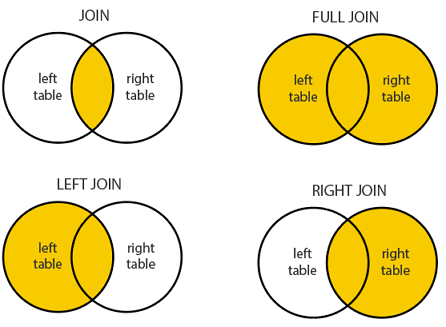

## Ejemplos de combinaciones con tablas

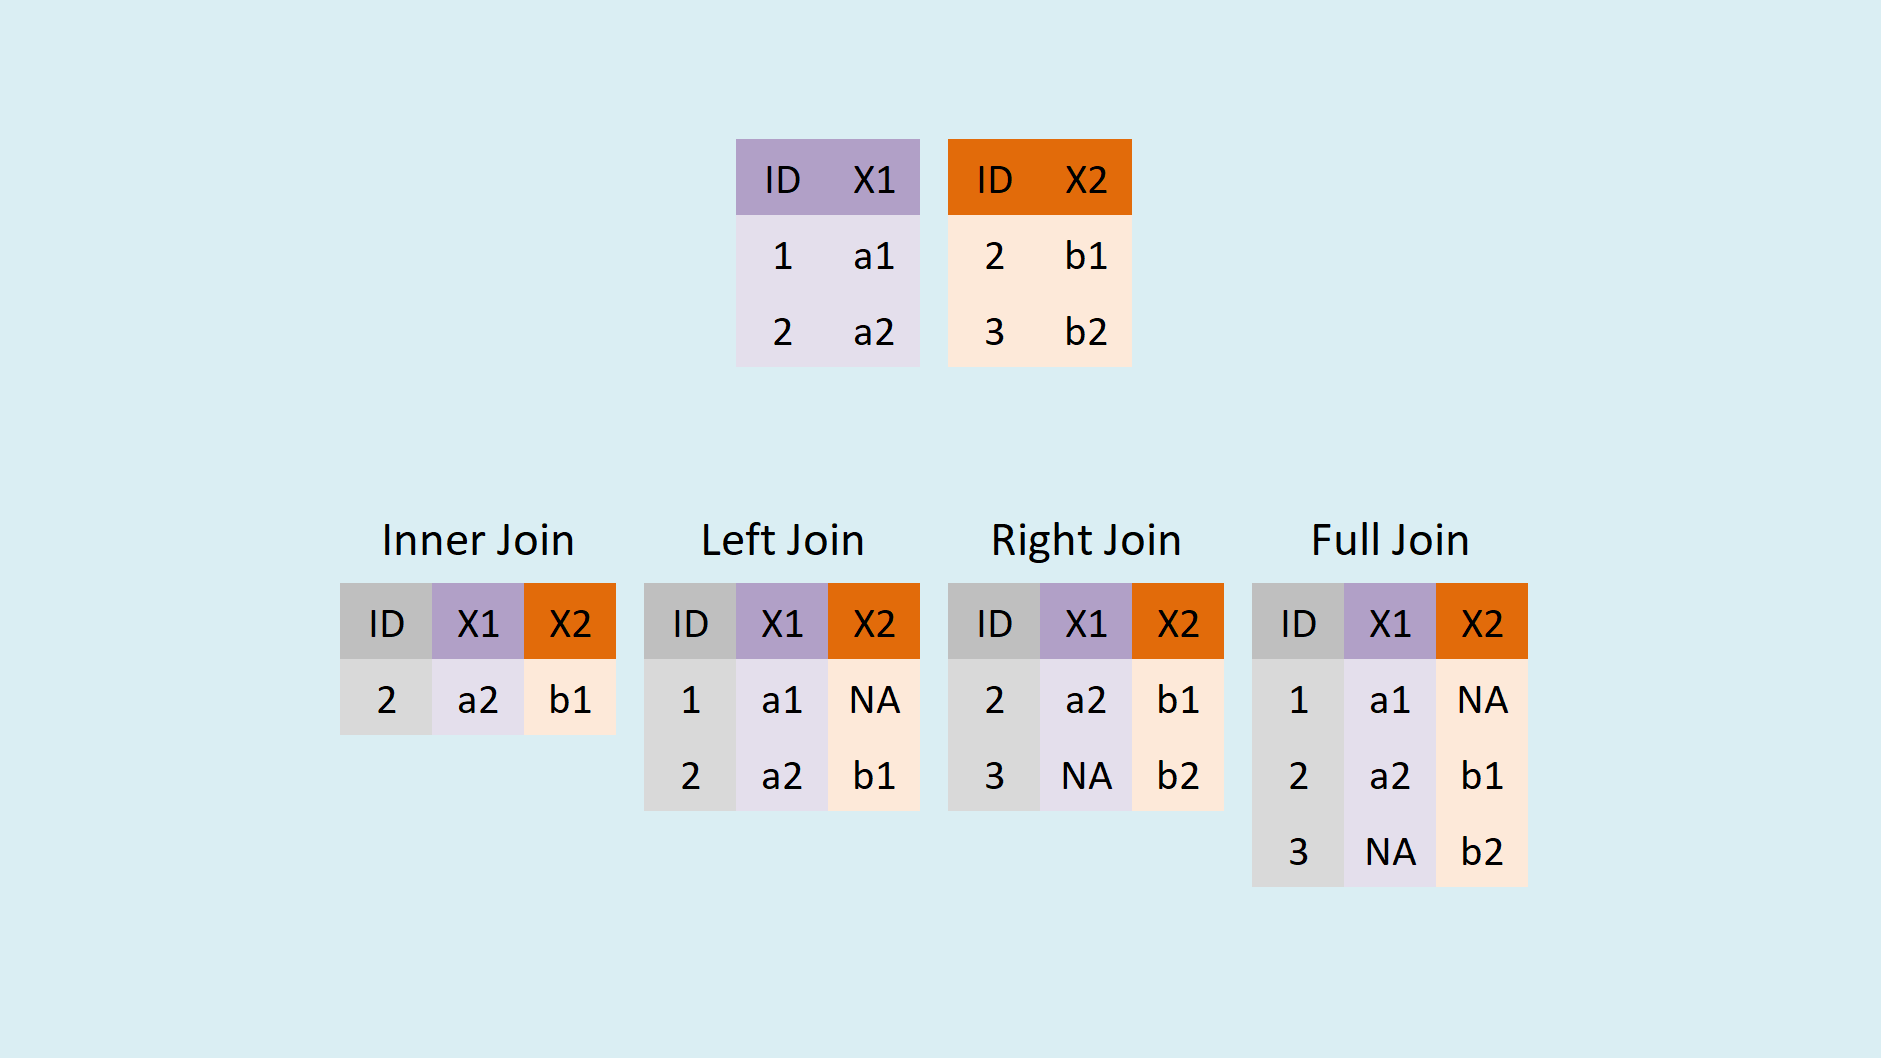

## Preración de Dataframes para los ejemplos

In [1]:
import pandas as pd

customers = [
    {'customer_id': 1, 'first_name': 'John'},
    {'customer_id': 2, 'first_name': 'Robert'},
    {'customer_id': 3, 'first_name': 'David'},
    {'customer_id': 4, 'first_name': 'John'},
    {'customer_id': 5, 'first_name': 'Betty'}
]

orders = [
    {'order_id': 1, 'amount': 200, 'customer': 10},
    {'order_id': 2, 'amount': 500, 'customer': 3},
    {'order_id': 3, 'amount': 300, 'customer': 6},
    {'order_id': 4, 'amount': 800, 'customer': 5},
    {'order_id': 5, 'amount': 150, 'customer': 8}
]


# Crear Dataframe desde lista de diccionarios "customers"
df_customers = pd.DataFrame(customers)

# Crear Dataframe desde lista de diccionarios "orders"
df_orders = pd.DataFrame(orders)

# Mostrar Dataframes df_cutomers
df_customers

,customer_id,first_name
0,1,John
1,2,Robert
2,3,David
3,4,John
4,5,Betty


In [2]:
# Mostrar Dataframe df_orders
df_orders

,order_id,amount,customer
0,1,200,10
1,2,500,3
2,3,300,6
3,4,800,5
4,5,150,8


## Función join()

La función `join()` en Pandas se utiliza para combinar dos o más dataframes *en función de sus índices o columnas*. La sintaxis básica de la función `join()` es la siguiente:

```python
pd.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
```

Donde:

- `other`: es el dataframe con el que se desea combinar.
- `on`: es el nombre de la columna (o índice) en la que se desea realizar la unión.
- `how`: es el tipo de unión que se desea realizar, puede ser "left", "right", "outer" o "inner".
- `lsuffix`: sufijo a agregar a los nombres de las columnas del dataframe original (izquierdo) en caso de conflictos.
- `rsuffix`: sufijo a agregar a los nombres de las columnas del dataframe que se está uniendo (derecho) en caso de conflictos.
- `sort`: es un valor booleano que indica si se deben ordenar los índices antes de realizar la unión.

### Inner Join con join()

El INNER JOIN selecciona todas las filas de ambas tablas siempre y cuando haya una coincidencia entre las columnas.

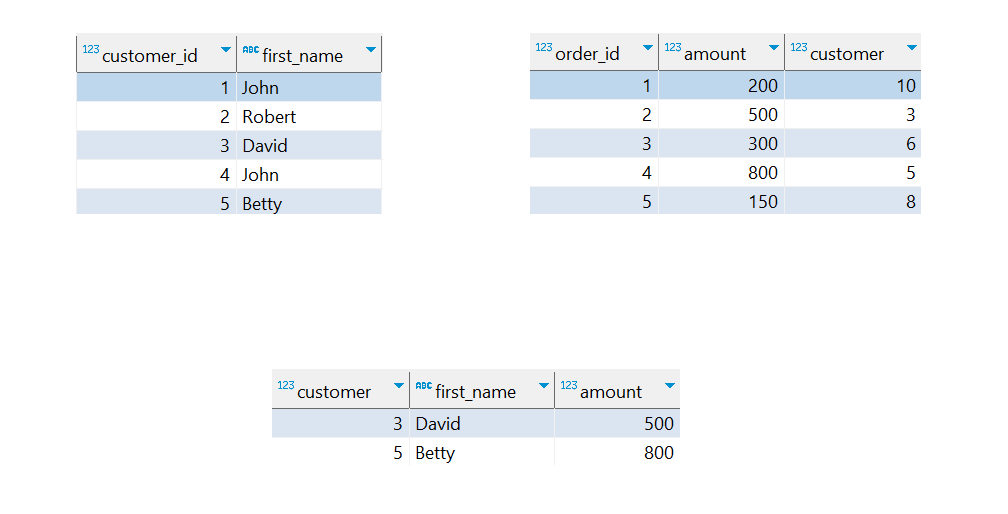

In [3]:
# Unir los dataframes utilizando la función join()
# df_orders.set_index('customer') devuelve in Dataframe donde el índice es 
# 'customer'. Como en set_index() no utilizamos inplace, no de modifica 
# el Dataframe original. Indicar el índice a utilizar para las coincidencias, 
# es necesario para que join() funciones correctamente.
nuevo_df = df_customers.join(df_orders.set_index('customer'), on='customer_id', how='inner')

# Mostrar el nuevo dataframe
nuevo_df[['customer_id', 'first_name', 'amount']]

,customer_id,first_name,amount
2,3,David,500
4,5,Betty,800


### Left Join con join()

El LEFT JOIN une dos tablas en función de una columna común y selecciona los registros que tienen valores coincidentes en esta columna y las filas restantes de la tabla izquierda.

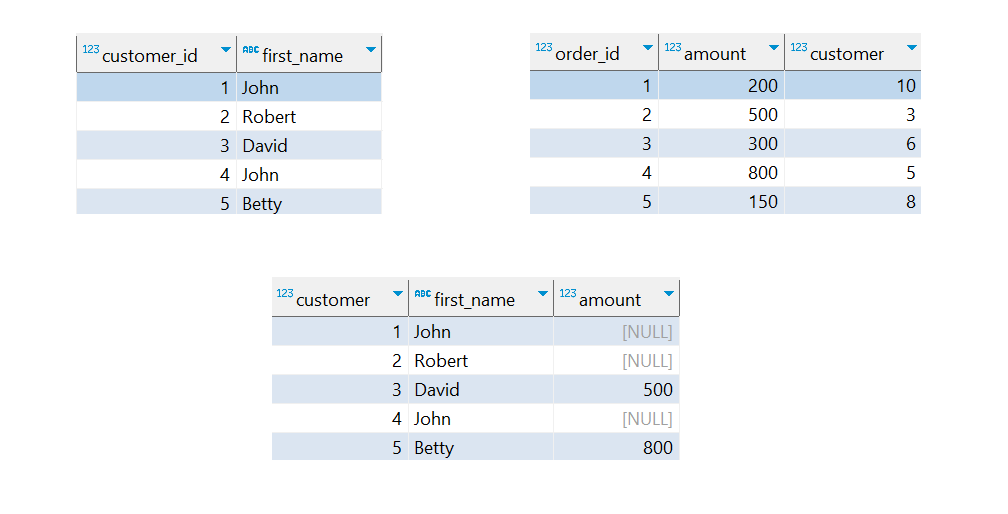

In [4]:
# Unir los dataframes utilizando la función join()
nuevo_df = df_customers.join(df_orders.set_index('customer'), on='customer_id', 
                             how='left')

# Mostrar el nuevo dataframe
nuevo_df[['customer_id', 'first_name', 'amount']]

,customer_id,first_name,amount
0,1,John,NaN
1,2,Robert,NaN
2,3,David,500.0
3,4,John,NaN
4,5,Betty,800.0


### Right Join con join()

El RIGHT JOIN une dos tablas en función de una columna común y selecciona los registros que tienen valores coincidentes en esta columna y las filas restantes de la tabla derecha.

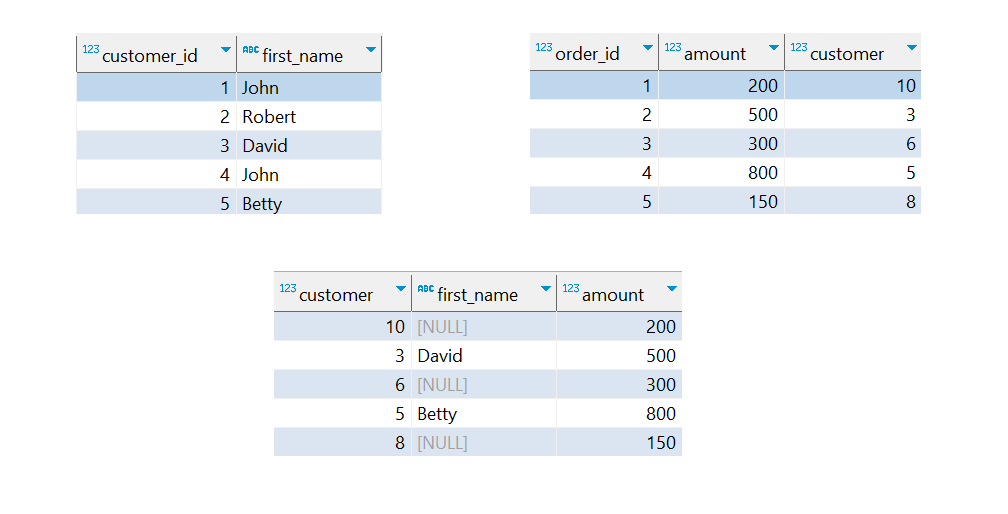

In [5]:
# Unir los dataframes utilizando la función join()
nuevo_df = df_customers.join(df_orders.set_index('customer'), on='customer_id', 
                             how='right', sort='customer_id')

# Mostrar el nuevo dataframe
nuevo_df[['customer_id', 'first_name', 'amount']]


,customer_id,first_name,amount
2.0,3,David,500
4.0,5,Betty,800
NaN,6,NaN,300
NaN,8,NaN,150
NaN,10,NaN,200


### Full Outer Join con join()

El FULL OUTER JOIN une dos tablas en función de una columna común y selecciona los registros que tienen valores coincidentes en esta columna y las filas restantes de ambas tablas.

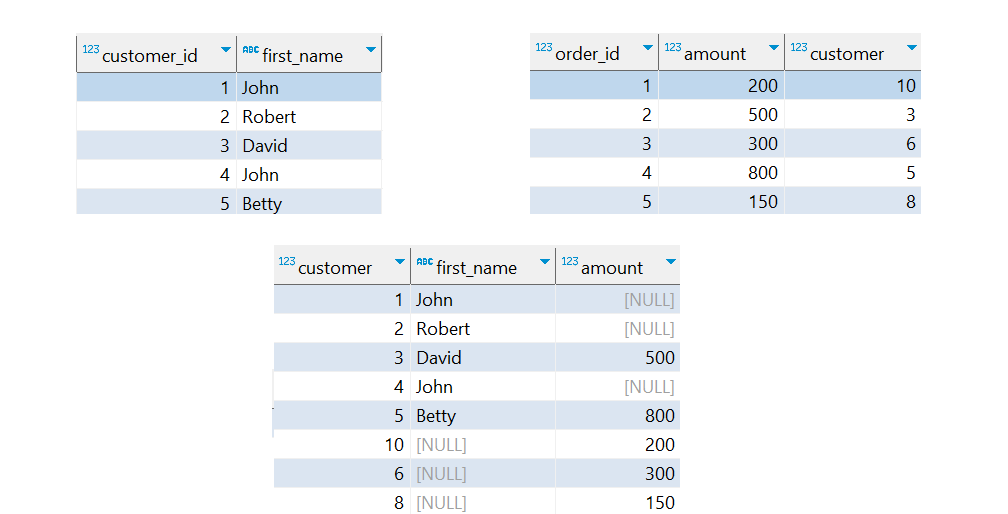

In [6]:
# Unir los dataframes utilizando la función join()
nuevo_df = df_customers.join(df_orders.set_index('customer'), on='customer_id', 
                             how='outer')

# Mostrar el nuevo dataframe
nuevo_df[['customer_id', 'first_name', 'amount']]


,customer_id,first_name,amount
0.0,1,John,NaN
1.0,2,Robert,NaN
2.0,3,David,500.0
3.0,4,John,NaN
4.0,5,Betty,800.0
NaN,6,NaN,300.0
NaN,8,NaN,150.0
NaN,10,NaN,200.0


## Función merge()

La función `merge()` en Pandas se utiliza para combinar dos o más conjuntos de datos en un solo conjunto de datos. La función es muy útil cuando se tiene información dispersa en diferentes conjuntos de datos y se desea consolidar en una única tabla.

La función `merge()` toma dos o más DataFrames como entrada y une los DataFrames en función de una o más columnas que tienen valores en común. Por defecto, la función `merge()` une los DataFrames en función de las columnas que tienen los mismos nombres. Si los nombres de las columnas son diferentes, se pueden especificar las columnas a utilizar para la unión.

La sintaxis básica de la función `merge()` es la siguiente:

```python
pd.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
```

Donde:
- `on`: Etiqueta o lista de nombres de columnas o niveles de índices para unir. Estos deben encontrarse en ambos DataFrames. Si on es None y no se está uniendo por índices, esto se establece por defecto en la intersección de las columnas en ambos DataFrames.
- `left_on`: Etiqueta o lista de nombres de columnas o niveles de índices para unir en el DataFrame izquierdo. También puede ser una matriz o lista de matrices de la longitud del DataFrame izquierdo. Estas matrices se tratan como si fueran columnas.
- `right_on`: Etiqueta o lista de nombres de columnas o niveles de índices para unir en el DataFrame derecho. También puede ser una matriz o lista de matrices de la longitud del DataFrame derecho. Estas matrices se tratan como si fueran columnas.
- `how`: {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, predeterminado `inner`
Tipo de unión a realizar. `left`: usar solo las claves del marco izquierdo, similar a un join externo izquierdo de SQL; preserva el orden de las claves. `right`: usar solo las claves del marco derecho, similar a un join externo derecho de SQL; preserva el orden de las claves. `outer`: usar la unión de claves de ambos marcos, similar a un join completo externo de SQL; ordenar las claves lexicográficamente. `inner`: usar la intersección de claves de ambos marcos, similar a un join interno de SQL; preservar el orden de las claves izquierdas. `cross`: crea el producto cartesiano de ambos marcos, preservando el orden de las claves izquierdas.

Para ver la descripción completa de todos los parámetros, podemos ir a la ayuda de Pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

En pandas, tanto `merge()` como `join()` se utilizan para combinar DataFrames basados en una o más columnas comunes. La principal diferencia entre estas dos funciones radica en la forma en que se especifica la columna común y cómo se manejan los índices.

La función `merge()` es más flexible que `join()`, ya que permite especificar explícitamente las columnas de unión, y puede manejar situaciones en las que las columnas tienen nombres diferentes en los DataFrames que se combinan. Además, `merge()` permite seleccionar diferentes tipos de uniones (left, right, inner, outer) y manejar casos en los que hay duplicados en las columnas de unión.

Por otro lado, `join()` es una función más simple que está disponible como un método directamente en los DataFrames. Solo admite uniones en el índice de los DataFrames y, por defecto, realiza una unión izquierda (left join) si no se especifica lo contrario.

En resumen, `merge()` es más flexible y puede manejar situaciones más complejas de unión, mientras que `join()` es una función más simple y directa que se limita a uniones en los índices de los DataFrames.

### Inner join utilizando merge()

In [7]:
# Unir los dataframes utilizando la función merge()
nuevo_df = pd.merge(df_customers, df_orders, left_on='customer_id', right_on='customer', how='inner')

# Mostrar el nuevo dataframe
nuevo_df


,customer_id,first_name,order_id,amount,customer
0,3,David,2,500,3
1,5,Betty,4,800,5


### Left join utilizando merge()

In [8]:
# Unir los dataframes utilizando la función merge()
nuevo_df = pd.merge(df_customers, df_orders, left_on='customer_id', right_on='customer', how='left')

# Mostrar el nuevo dataframe
nuevo_df

,customer_id,first_name,order_id,amount,customer
0,1,John,NaN,NaN,NaN
1,2,Robert,NaN,NaN,NaN
2,3,David,2.0,500.0,3.0
3,4,John,NaN,NaN,NaN
4,5,Betty,4.0,800.0,5.0


### Ritgh join utilizando merge()

In [9]:
# Unir los dataframes utilizando la función merge()
nuevo_df = pd.merge(df_customers, df_orders, left_on='customer_id', right_on='customer', how='right')

# Mostrar el nuevo dataframe
nuevo_df

,customer_id,first_name,order_id,amount,customer
0,NaN,NaN,1,200,10
1,3.0,David,2,500,3
2,NaN,NaN,3,300,6
3,5.0,Betty,4,800,5
4,NaN,NaN,5,150,8


### Full outer join utilizando merge()

In [10]:
# Unir los dataframes utilizando la función merge()
nuevo_df = pd.merge(df_customers, df_orders, left_on='customer_id', right_on='customer', how='outer')

# Mostrar el nuevo dataframe
nuevo_df

,customer_id,first_name,order_id,amount,customer
0,1.0,John,NaN,NaN,NaN
1,2.0,Robert,NaN,NaN,NaN
2,3.0,David,2.0,500.0,3.0
3,4.0,John,NaN,NaN,NaN
4,5.0,Betty,4.0,800.0,5.0
5,NaN,NaN,3.0,300.0,6.0
6,NaN,NaN,5.0,150.0,8.0
7,NaN,NaN,1.0,200.0,10.0


## Función concat()

La función `concat()` en pandas se utiliza para concatenar dos o más dataframes a lo largo de un eje específico, ya sea horizontal o verticalmente.

La sintaxis básica de la función `concat()` es la siguiente:

```python
pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None)
```

Donde:

- `objs`: es una lista de objetos pandas que se desean concatenar.
- `axis`: es el eje a lo largo del cual se desea concatenar los dataframes, 0 para concatenar verticalmente y 1 para concatenar horizontalmente.
- `join`: es el tipo de unión que se desea realizar, puede ser "outer" para una unión externa o "inner" para una unión interna.
- `ignore_index`: es un valor booleano que indica si se desea ignorar los índices originales de los dataframes que se están concatenando.
- `keys`: es una lista de claves que se pueden utilizar para identificar los dataframes originales en el resultado.

Al unir múltiples DataFrames, tenemos la opción de cómo manejar los otros ejes (que no sean el eje que se está concatenando). Esto se puede hacer de las siguientes dos maneras:

- Tomar la unión de todos ellos, join='outer'. Esta es la opción predeterminada ya que resulta en ninguna pérdida de información.

- Tomar la intersección, join='inner'.

### Ejemplo de concat() usando el eje vertical

En este ejemplo haremos una concatenación en el eje vertical.

Aquí el parámetro join='outer' indica que queremos hacer una concatenación por índices, es decir, que se incluyan todas las filas de ambos DataFrames y los valores faltantes se llenen con NaN.

In [11]:
import pandas as pd

# Definir dos dataframes de ejemplo
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df2 = pd.DataFrame({'A': [4, 5, 6], 'B': [7, 8, 9], 'C': [10, 11, 12]})

# Concatenar los dataframes verticalmente. Por defecto join='outer'
nuevo_df = pd.concat([df1, df2], axis=0)

# Mostrar el nuevo dataframe
nuevo_df

,A,B,C
0,1,4,NaN
1,2,5,NaN
2,3,6,NaN
0,4,7,10.0
1,5,8,11.0
2,6,9,12.0


### Ejemplo de concat() usando el eje vertical y join='inner'

Ahora, veamos un ejemplo de concatenación vertical, usando join='inner'. Esto quiere decir que se hará la intersección

In [12]:
import pandas as pd

# Definir dos dataframes de ejemplo
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df2 = pd.DataFrame({'A': [4, 5, 6], 'B': [7, 8, 9], 'C': [10, 11, 12]})

# Concatenar los dataframes verticalmente
nuevo_df = pd.concat([df1, df2], axis=0, join='inner')

# Mostrar el nuevo dataframe
nuevo_df

,A,B
0,1,4
1,2,5
2,3,6
0,4,7
1,5,8
2,6,9


En el ejemplo proporcionado, el parámetro join='inner' indica que la concatenación debe realizarse solo en aquellas columnas que se encuentran en ambos dataframes. En otras palabras, solo se incluirán las columnas que tienen el mismo nombre en ambos dataframes. En este caso, solo la columna 'A' y 'B' cumplen este requisito, por lo que se realizará una concatenación solo de estas columnas. El resultado será un nuevo dataframe con dos filas y dos columnas ('A' y 'B') que contendrá los valores de ambas columnas en ambos dataframes.

En resumen, el efecto de join='inner' es realizar una concatenación solo en aquellas columnas que tienen el mismo nombre en ambos dataframes, resultando en una intersección de las columnas.

### Ejemplo de concat() usando el eje horizontal

Aquí, el parámetro axis=1 indica que queremos concatenar horizontalmente (por columnas).

In [13]:
import pandas as pd

# Definir dos dataframes de ejemplo
df1 = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [4, 5, 6, 7]})
df2 = pd.DataFrame({'C': [7, 8, 9], 'D': [10, 11, 12]})

# Concatenar los dataframes horizontalmente. Por defecto join='outer'
nuevo_df = pd.concat([df1, df2], axis=1)

# Mostrar el nuevo dataframe
nuevo_df

,A,B,C,D
0,1,4,7.0,10.0
1,2,5,8.0,11.0
2,3,6,9.0,12.0
3,4,7,NaN,NaN


### Ejemplo de concat() usando el eje horizontal y join='inner'

Ahora, veamos un ejemplo de concatenación horizontal, usando join='inner'.

In [14]:
from numpy import NaN
import pandas as pd

# Definir dos dataframes de ejemplo
df1 = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [4, 5, 6, 7]})
df2 = pd.DataFrame({'C': [7, 8, 9], 'D': [10, 11, 12]})

# Concatenar los dataframes verticalmente
nuevo_df = pd.concat([df1, df2], axis=1, join='inner')

# Mostrar el nuevo dataframe
nuevo_df

,A,B,C,D
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


El parámetro join se utiliza para especificar cómo se deben manejar las filas que no son comunes en los DataFrames que se están uniendo. Cuando se utiliza join='inner', la función concat() solo incluirá las filas que son comunes a ambos DataFrames. Las filas que no existen en ambos DataFrames se eliminan.

## Uniones cruzadas (Cross Joins)

El método `merge()` también permite realizar una unión cruzada (cross join), que devuelve todas las combinaciones posibles entre los registros de dos dataframes, independientemente de si los valores coinciden o no. Para realizar una unión cruzada, se puede establecer el parámetro `how` en "cross".

A continuación se muestra un ejemplo de cómo realizar una unión cruzada entre dos dataframes utilizando el método `merge()` con el parámetro `how='cross'`:

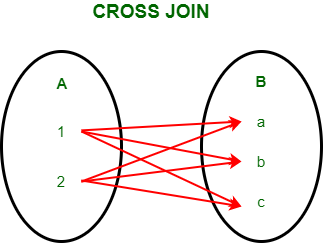

In [15]:
import pandas as pd

# Definir dos dataframes de ejemplo
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': ['a', 'b', 'c']})

# Realizar una unión cruzada entre los dataframes
nuevo_df = pd.merge(df1, df2, how='cross')

# Imprimir el nuevo dataframe resultante
nuevo_df

,A,B
0,1,a
1,1,b
2,1,c
3,2,a
4,2,b
5,2,c


Es importante tener en cuenta que realizar una unión cruzada puede generar un dataframe muy grande si los dataframes originales son grandes. Por lo tanto, se debe tener cuidado al utilizar esta técnica y asegurarse de que sea realmente necesaria para el análisis que se está realizando.

Supongamos que se tiene una tienda en línea que vende productos electrónicos y se quiere realizar un análisis para conocer todas las posibles combinaciones de productos que se pueden vender juntos en un paquete promocional. Para ello, se tiene un DataFrame con una lista de productos electrónicos y otro DataFrame con una lista de accesorios.

Se puede utilizar un cross join para generar un DataFrame con todas las posibles combinaciones de productos y accesorios. Por ejemplo:

In [16]:
import pandas as pd

# Crear DataFrame de productos electrónicos
productos_electronicos = pd.DataFrame({'Producto': ['Laptop', 'Smartphone', 'Tablet']})

# Crear DataFrame de accesorios
accesorios = pd.DataFrame({'Accesorio': ['Cargador', 'Auriculares', 'Estuche']})

# Realizar cross join
nuevo_df = pd.merge(productos_electronicos, accesorios, how='cross')

# Mostrar DataFrame resultante
nuevo_df

,Producto,Accesorio
0,Laptop,Cargador
1,Laptop,Auriculares
2,Laptop,Estuche
3,Smartphone,Cargador
4,Smartphone,Auriculares
5,Smartphone,Estuche
6,Tablet,Cargador
7,Tablet,Auriculares
8,Tablet,Estuche


En este ejemplo, se ha utilizado un cross join para generar todas las posibles combinaciones de productos electrónicos y accesorios que se podrían ofrecer juntos en un paquete promocional. Esto podría ayudar a identificar combinaciones de productos y accesorios que se venden bien juntos y a diseñar paquetes promocionales efectivos para los clientes.